In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
bikes = pd.read_csv("sheep.csv")

In [8]:
bikes.head()

,Year,Sheeps
0,1867,2203
1,1868,2360
2,1869,2254
3,1870,2165
4,1871,2024


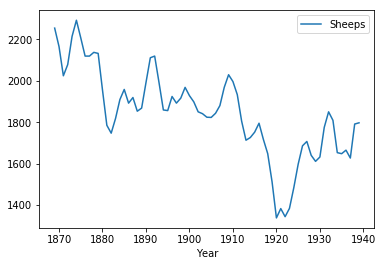

In [9]:
bikes[2:73].plot(x="Year", y="Sheeps")

In [10]:
import numpy as np
X = bikes["Year"]
y = bikes["Sheeps"]
Xn = X/X.max()

yn = y/100

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
class RedNeuronal(object):
    def __init__(self):
        self.inputs = 2
        self.hidden = 3
        self.outputs = 1
        self.W1 = np.random.randn(self.inputs, self.hidden)
        self.W2 = np.random.randn(self.hidden, self.outputs)
        
    def sigmoide(self, Z):
        return 1/(1+np.exp(-Z))
    
    def feedForward(self,X):
        self.z2 = X @ self.W1
        self.a2 = self.sigmoide(self.z2)
        self.z3 = self.a2 @ self.W2
        self.yhat = self.sigmoide(self.z3)
        return self.yhat
    
    def sigmoideDerivada(self,Z):
        return np.exp(-Z)/((1+np.exp(-Z))**2)
    
    def funcionCosto(self, X, y):
        self.yhat = self.feedForward(X)
        Costo = 0.5*sum((y-self.yhat)**2)
        return Costo
    
    def funcionDeCostoDerivada(self, X, y):
    #Predicciones
        self.yhat = self.feedForward(X) 
    
    #delta 3 = diferencia de y -yhat * derivadaFuncionActivacion
        self.delta3 = np.multiply(-(y-self.yhat), self.sigmoideDerivada(self.z3))
    
    #djW2 = producto de la transpuesta a2 * delta 3
        djW2 = self.a2.T @ self.delta3
    
    #delta2 = delta3 * transpuesta W2 * sigmoideDerivada z2
        self.delta2 = self.delta3 @ self.W2.T * self.sigmoideDerivada(self.z2)
    
    #djW1 delta2 * transpuesta x
        djW1 = X.T @ self.delta2
    
        return djW1 , djW2
    
    def getPesos(self):
        data = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return data
   
    def setPesos(self, datos):
        W1_inicio = 0
        W1_fin = self.hidden * self.inputs
        self.W1 = np.reshape(datos[W1_inicio:W1_fin], (self.inputs , self.hidden))
        W2_fin = W1_fin + self.hidden*self.outputs
        self.W2 = np.reshape(datos[W1_fin:W2_fin], (self.hidden, self.outputs))
   
    def getGradientes(self, X, y):
        djW1, djW2 = self.funcionDeCostoDerivada(X, y)
        return np.concatenate((djW1.ravel(), djW2.ravel()))
    

In [11]:
nn = RedNeuronal()

In [16]:
e = Entrenador(nn)

In [17]:
#Entrenamiento
trainX = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
trainY = np.array(([75], [82], [93], [70]), dtype=float)
 
#Pruebas
testX = np.array(([4, 5.5], [4.5,1], [9,2.5], [6, 2]), dtype=float)
testY = np.array(([70], [89], [85], [75]), dtype=float)
 
#Normalización
trainX = trainX/np.amax(trainX, axis=0)
trainY = trainY/100
 
testX = testX/np.amax(trainX, axis=0)
testY = testY/100

In [18]:
from scipy import optimize
class Entrenador:
    def __init__(self, unaRed):
        #referencia a una red local
        self.NN = unaRed
       
    def actualizaPesos(self, params):
        self.NN.setPesos(params)
        self.Costos.append(self.NN.funcionCosto(self.X, self.y)) 
        self.CostosTest.append(self.NN.funcionCosto(self.Xtest, self.ytest))
       
    def obtenPesosNN(self, params, X, y):
        self.NN.setPesos(params)
        cost = self.NN.funcionCosto(X, y)
        grad = self.NN.getGradientes(X, y)        
        return cost, grad
       
    def entrena(self, Xtrain, ytrain, Xtest, ytest):
        # variables para funciones callback
        self.X = Xtrain
        self.y = ytrain
        
        self.Xtest = Xtest
        self.ytest = ytest
           
        # lista temporal de costos
        self.Costos = []
        self.CostosTest = []
        
        pesos = self.NN.getPesos()
 
        opciones = {'maxiter': 200, 'disp' : True}
       
        #self.obtenPesosNN, funcion objetivo
        #args=(X, y), input / output data
        # salida, regresa el costo y los gradientes
        salida = optimize.minimize(self.obtenPesosNN, pesos, jac=True, method='BFGS', \
                                 args=(Xtrain, ytrain), options=opciones, callback=self.actualizaPesos)
 
        self.NN.setPesos(salida.x)
        self.resultados = salida

In [19]:
nn = RedNeuronal()
e = Entrenador (nn)
e.entrena(trainX, trainY, testX, testY)

         Current function value: 0.000303
         Iterations: 200
         Function evaluations: 227
         Gradient evaluations: 227


Text(0.5,0,'iteracion')

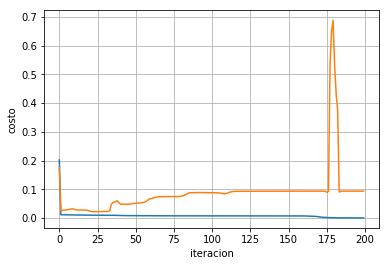

In [21]:
plt.plot(e.Costos)
plt.plot(e.CostosTest)
plt.grid(1)
plt.ylabel("costo")
plt.xlabel("iteracion")